# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Note:** This notebook is AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Overview
This notebook explores the Dandiset "Septum GABA disruption with DREADDs," which investigates the effects of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

[View the Dandiset on DANDI Archive](https://dandiarchive.org/dandiset/001375)

## What This Notebook Covers
- Loading the Dandiset using the DANDI API.
- Visualizing key data aspects, including electrode locations, time series segments, and trial intervals.

## Required Packages
Ensure the following packages are installed in your environment: `pynwb`, `h5py`, `remfile`, `matplotlib`, `pandas`, `numpy`.

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nAssets:")
for i, asset in enumerate(assets, start=1):
    print(f"{i}. {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

Assets:
1. sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
2. sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
3. sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Loading an NWB File

In [3]:
# Load NWB file using PyNWB and the provided URL
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
# Here you can iterate over the assets or let the user select
remote_file = remfile.File(assets[0].get_content_url(follow_redirects=1, strip_query=True))
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualizing Electrode Locations

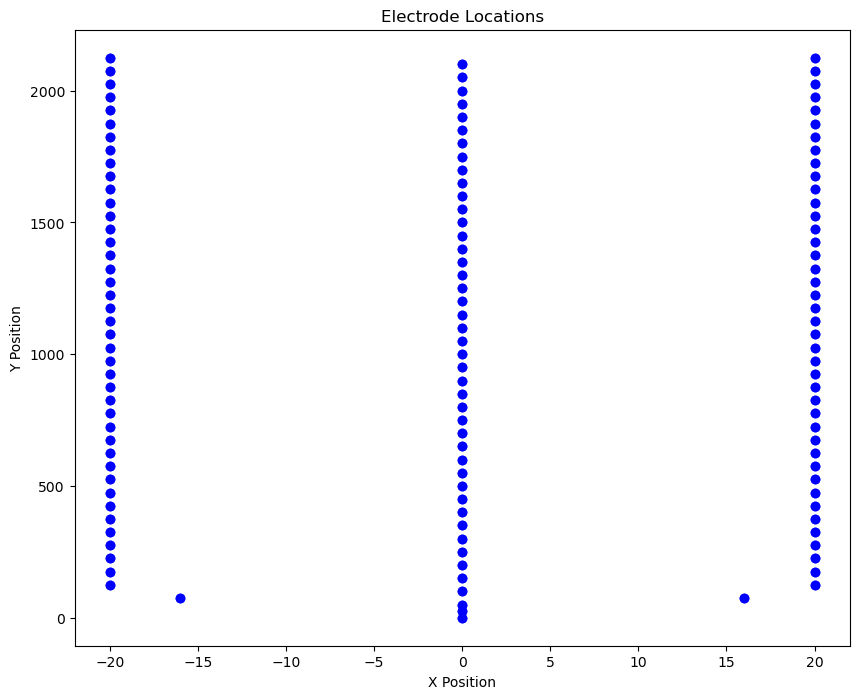

In [4]:
electrodes_df = nwb.electrodes.to_dataframe()
plt.figure(figsize=(10, 8))
plt.scatter(electrodes_df['x'], electrodes_df['y'], c='blue')
plt.title('Electrode Locations')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

## Visualizing a Segment of Time Series Data

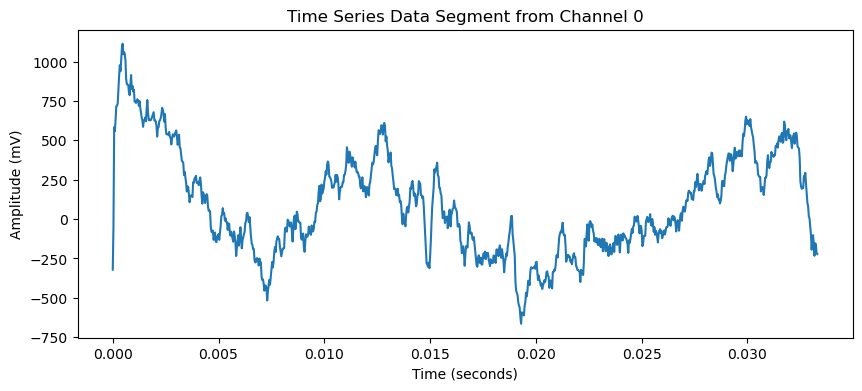

In [5]:
time_series = nwb.acquisition['time_series']
data_segment = time_series.data[0:1000, 0]  # Small subset for visualization
sampling_rate = time_series.rate
time_axis = np.arange(data_segment.shape[0]) / sampling_rate
plt.figure(figsize=(10, 4))
plt.plot(time_axis, data_segment)
plt.title('Time Series Data Segment from Channel 0')
plt.xlabel('Time (seconds)')
plt.ylabel(f'Amplitude ({time_series.unit})')
plt.show()

## Visualizing Trial Start Times

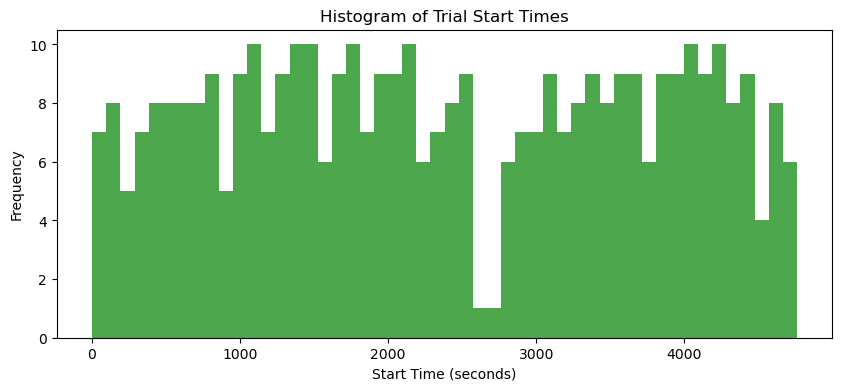

In [6]:
trials_df = nwb.trials.to_dataframe()
plt.figure(figsize=(10, 4))
plt.hist(trials_df['start_time'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of Trial Start Times')
plt.xlabel('Start Time (seconds)')
plt.ylabel('Frequency')
plt.show()

## Summary and Future Directions
This notebook provides an overview of Dandiset 001375, focusing on loading and visualizing NWB data. Future directions could involve more detailed analysis of the electrophysiological data and more complex visualizations. 

Close NWB file
Clarify trial conditions
print(f"Trial names: {trials_df.columns.values}")
print(f"Example trial: {trials_df.iloc[0].to_dict()}")
remote_file.close()